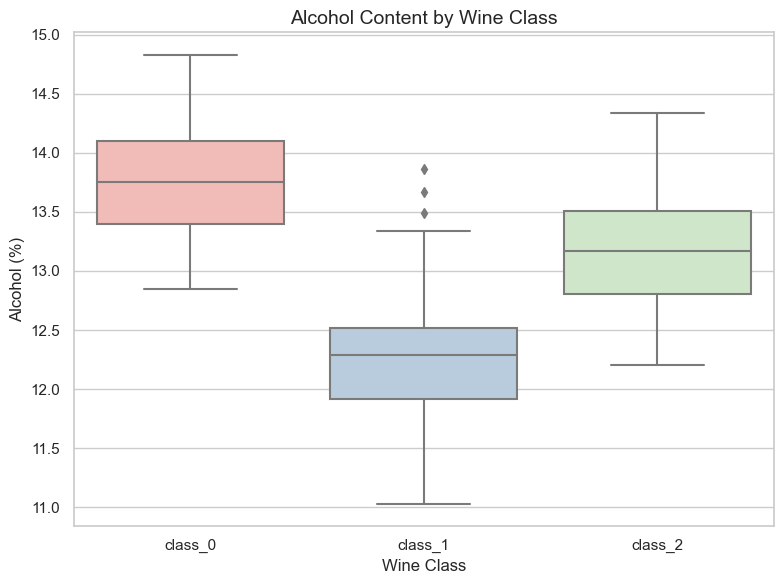

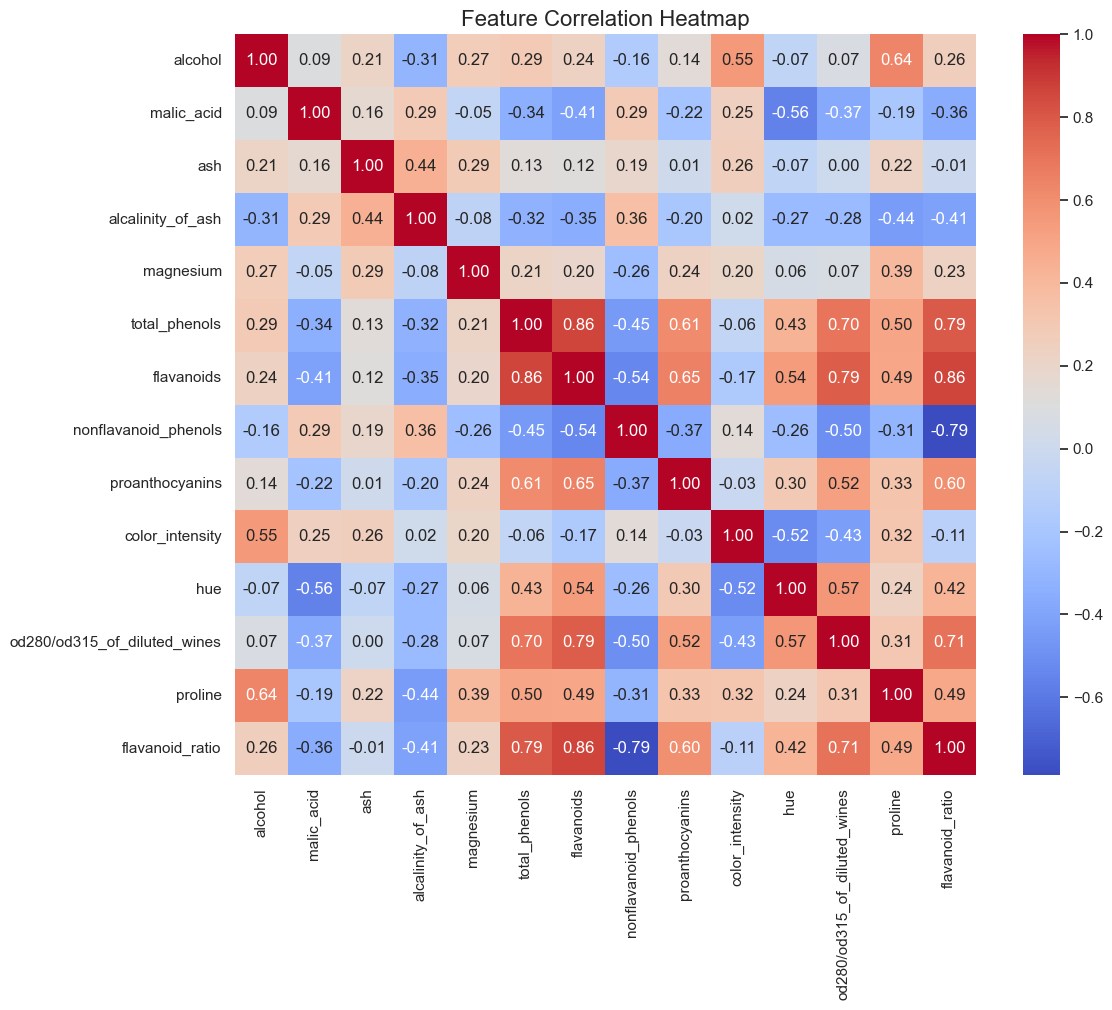

C:\Users\aishw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


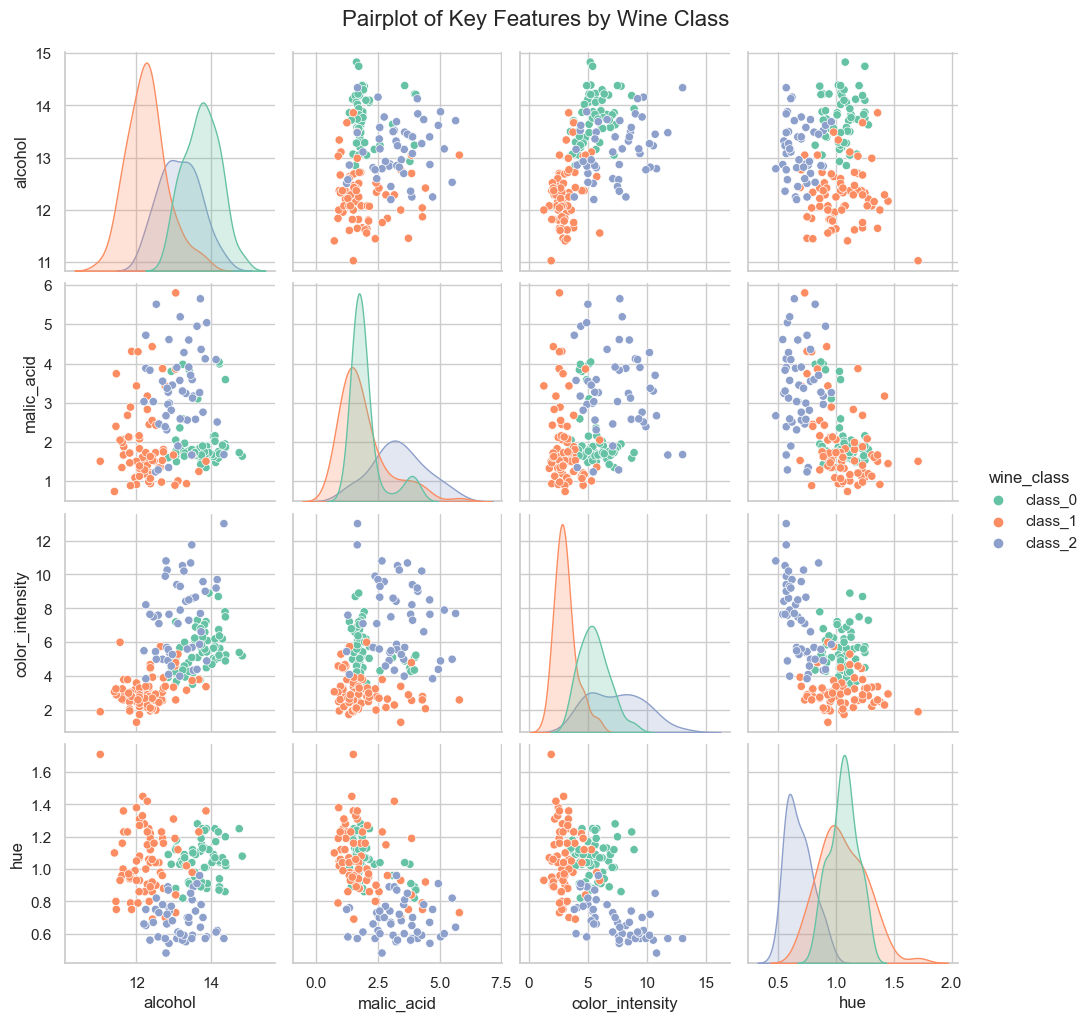

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

# Extract - Load dataset from sklearn
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['wine_class'] = pd.Categorical.from_codes(wine.target, wine.target_names)

#Transform
# Rename columns to snake_case for readability
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Create new feature: Flavanoid to Nonflavanoid Ratio (a custom transformation)
df['flavanoid_ratio'] = df['flavanoids'] / (df['nonflavanoid_phenols'] + 1e-5)  # Avoid division by zero

# Load - Save the transformed data
df.to_csv('transformed_wine_data.csv', index=False)

# Set up seaborn theme
sns.set(style="whitegrid")

# Boxplot of Alcohol by Wine Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='wine_class', y='alcohol', data=df, palette='Pastel1')
plt.title('Alcohol Content by Wine Class', fontsize=14)
plt.xlabel('Wine Class')
plt.ylabel('Alcohol (%)')
plt.tight_layout()
plt.show()

# Plot 2: Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation = df.drop('wine_class', axis=1).corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

#Plot 3: Pairplot of selected features by Wine Class
selected_features = ['alcohol', 'malic_acid', 'color_intensity', 'hue']
sns.pairplot(df[selected_features + ['wine_class']], hue='wine_class', palette='Set2')
plt.suptitle('Pairplot of Key Features by Wine Class', fontsize=16, y=1.02)
plt.show()


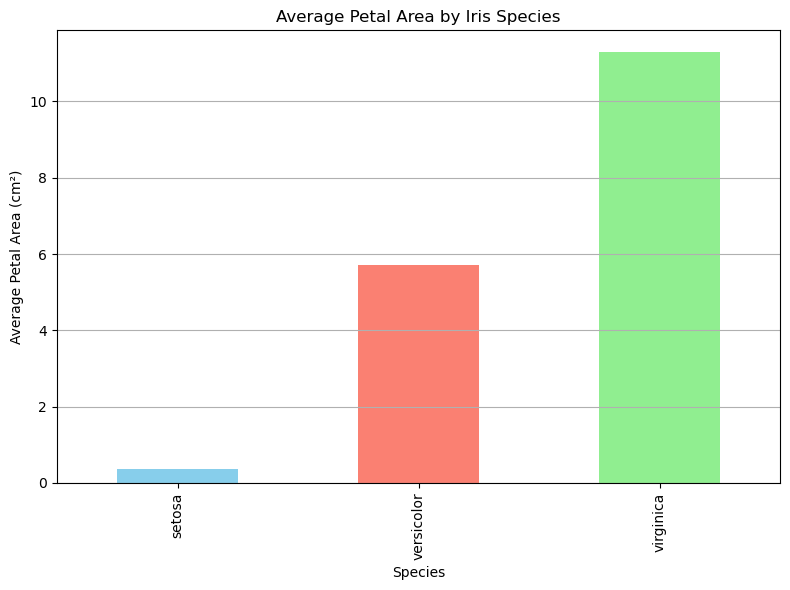

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# ----------- ETL Process -----------

# Step 1: Extract
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Step 2: Transform
# Let's rename columns to simpler names
data.columns = [col.replace(' (cm)', '').replace(' ', '_') for col in data.columns]

# Create a new column: petal_area
data['petal_area'] = data['petal_length'] * data['petal_width']

# Step 3: Load (optional – but let’s save it)
data.to_csv('cleaned_iris_data.csv', index=False)

# ----------- Data Visualization -----------

# Plot: Average petal area by species
avg_petal_area = data.groupby('species')['petal_area'].mean()

plt.figure(figsize=(8, 6))
avg_petal_area.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Average Petal Area by Iris Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Area (cm²)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
 
